Programmer: Giovanni Vecchione
Date: 2/12/24

Subject: Project 1
Create a Deep Neural Networks model using the data set of your choice. Model should have at least 4 hidden layers. Dropout and Batch Normalization layers are not counted.

!!!!!!!PLEASE READ BELOW!!!!!!!!
Model 2 ver. 1 is the final model for customization in Project 1 and if any further changes are needed. Everything else is for logging purposes.

MODEL 1 Ver. 1 - Image Classifier Using the Sequential API (w/o batch normalization and dropout layers)

1x input layer
1x flatten layer
3x hidden layers
1x output layer

Data set: Keras database of fashion_mnist

!!!!!NOTE!!!!!: This is an inaccurate representation of an image classifier due to errors. This was my first attempt at building a MLP, however model 1_2 corrects these issues. Left it in my notebook to showcase the improvements. Model 2 has the dropout and batch normalization layers

In [ ]:
import tensorflow as tf
import matplotlib as mpl

#Step 1 - Prep the data *********************************************************************************************

#import data - CHOOSE DATA, CREATE MLP, OBSERVE RESULTS, ADD ANOTHER LAYER SEE WHAT HAPPENS, FINE TUNE
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#split the data between training and test sets, and leave some left over for training set validation
#training set (60,000 images) and a test set (10,000 images), but well hold out the last 5,000 images from the training set for validation

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#scale and label if needed

#Step 2 - CREATING THE NEURAL NET (MLP for this one) ****************************************************************************

#NOTE -  the random weights of the hidden layers and the output layer will be the same every time you run the notebook. 
#You could also choose to use the tf.keras.utils.set_random_seed() function, 
#which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

tf.random.set_seed(42)
model1_1 = tf.keras.Sequential()

#input layer - Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
model1_1.add(tf.keras.layers.Input(shape=[28, 28]))

#flatten layer - converts each input image into a 1D array.
model1_1.add(tf.keras.layers.Flatten())

#hidden layers - activation function can be changed if needed. Each "Dense" layer manages its own weight matrix
model1_1.add(tf.keras.layers.Dense(300, activation="relu")) 
model1_1.add(tf.keras.layers.Dense(100, activation="relu"))
model1_1.add(tf.keras.layers.Dense(100, activation="relu"))

#output layer - 1 neuron per class, using the softmax activation function because the classes are exclusive.
model1_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1_1.summary()

#NOTE: You can add an optimizer so that you can adjust the learning rate, however we will save this for the next trial model

#if you want to see layers or weights use get_layer() and get_weights()

#Step 3 - Compile the model ***************************************************************************
#NOTE - Use sparse_categorical crossentropy loss because we have sparse labels (i.e., for each instance, there is just a target class index, 
#from 0 to 9 in this case),and the classes are exclusive.
model1_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#NOTE: You can add a adapt() call here, however we will save that for the next trial model

#Step 4 - Train and Evaluate model ***********************************************************************
#use fit() to train, epochs test how many trials occur
history1_1 = model1_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed
mse_test1_1, rmse_test1_1 = model1_1.evaluate(X_test, y_test)


#Step 6 - Visualize the data (if you want)

#Step 7 - Use the model to make predictions
X_new = X_test[:3]
y_pred = model1_1.predict(X_new)

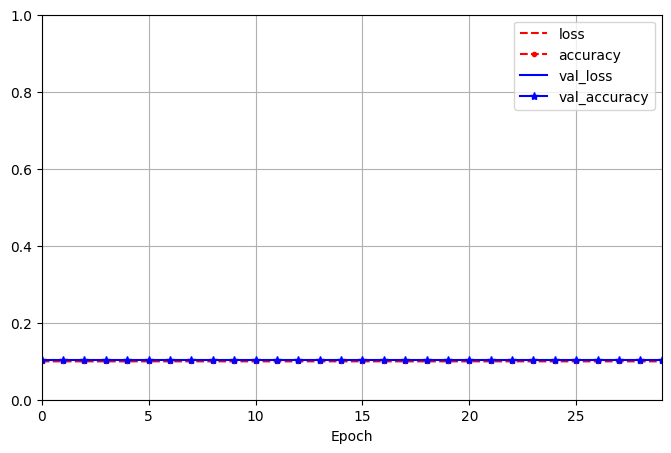

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

TEST 1: Model1.1 Results
Model1.1 above has some serious issues. First the loss is appearing as 'nan' which may be an error during calculations. Second the accuracy values are very poor.

Potential Reasons:
Vanishing/Exploding Gradients: With multiple hidden layers, ReLU activations, and no regularization, you could be running into gradient problems. It's essential to investigate this as a primary cause.

Learning Rate: Your learning rate may be too high, causing the optimizer to overshoot and create instability.

Architecture Imbalance: The relatively deep architecture, with the number of neurons in each layer, might not be optimal for this dataset.

MODEL 1 Ver. 2 - Image Classifier Using the Sequential API (Debugged and w/o batch normalization and dropout layers)

1x input layer
1x flatten layer
3x hidden layers 
1x output layer

Data set: Keras database of fashion_mnist

CORRECTIONS:
The prevous model had uneeded lines of code, and also forgot to scale and label the data.
Made corrections for appropriate output and now this is the correct strucutre.

In [1]:
import tensorflow as tf
import matplotlib as mpl

#Step 1 - Prep the data *********************************************************************************************

#import data - CHOOSE DATA, CREATE MLP, OBSERVE RESULTS, ADD ANOTHER LAYER SEE WHAT HAPPENS, FINE TUNE
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#split the data between training and test sets, and leave some left over for training set validation
#training set (60,000 images) and a test set (10,000 images), but well hold out the last 5,000 images from the training set for validation

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#scale
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

#label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Step 2 - CREATING THE NEURAL NET (MLP for this one) ****************************************************************************

#NOTE -  the random weights of the hidden layers and the output layer will be the same every time you run the notebook. 
#You could also choose to use the tf.keras.utils.set_random_seed() function, 
#which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

tf.random.set_seed(42)
model1_2 = tf.keras.Sequential()

#simplified model struct.
model1_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1_2.summary()

#NOTE: You can add an optimizer so that you can adjust the learning rate, however we will save this for the next trial model

#if you want to see layers or weights use get_layer() and get_weights()

#Step 3 - Compile the model ***************************************************************************
#NOTE - Use sparse_categorical crossentropy loss because we have sparse labels (i.e., for each instance, there is just a target class 
#index, from 0 to 9 in this case),and the classes are exclusive.
model1_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#NOTE: You can add a adapt() call here if using a normalization method, however we will save that for the next trial model

#Step 4 - Train and Evaluate model ***********************************************************************
#use fit() to train, epochs test how many trials occur
history1_2 = model1_2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
Total params: 268385 (1.02 MB)
Trainable params: 268385 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/30


17

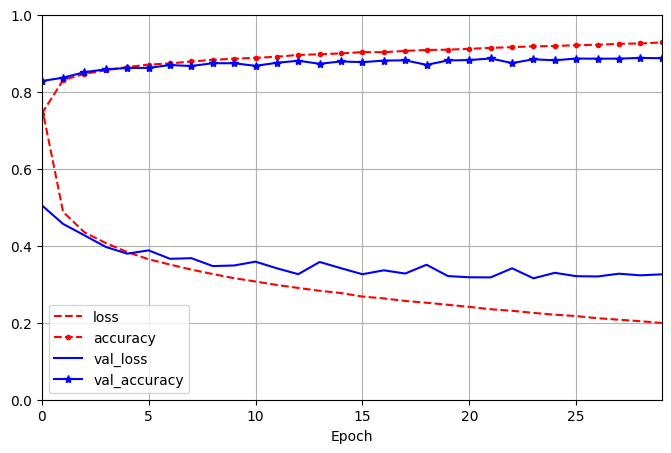

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1_2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

!!!!!!!!!FINAL MODEL TO USE IN PROJECT 2!!!!!!!!!!!!!!!!!!!

MODEL 2 ver. 1- Image Classifier Using the Sequential API (w/ Batch Normalization and Dropout Layers)

4x hidden layers, 1x input layer (flatten), includes batch normalization and dropout layers

Data set: Keras database of fashion_mnist
Status: Done

NOTE: 
-Cleaned up format of code
-Use of  Dropout and Batch Normalization layers

In [4]:
import tensorflow as tf
import matplotlib as mpl

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

tf.random.set_seed(42)

model2_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.15),

    tf.keras.layers.Dense(300, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.15),

    tf.keras.layers.Dense(100,kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(50, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(10, activation="softmax")
])

#NOTE: There is debate on which order the layers should be in, however generally dropout is after the activation function
#Although based on some research a recommended way to do it is; Dense/Convolutional , Batch Norm, Activation Function, then dropout

model2_1.summary()

model2_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history2_1 = model2_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 batch_normalization (Batch  (None, 300)               1200      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 300)               0         
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_5 (Dense)             (None, 300)               90300     
                                                      

Test: 1
Dropout Rates: .2 , .2
Neurons: 400, 300, 100, 50, 10
Activiation: All relu
Results: Ok (Needs improvement)
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9067 - val_loss: 0.2961 - val_accuracy: 0.8894


Test: 2
Dropout Rates: .25 , .25
Neurons: 400, 300, 100, 50, 10
Activiation: All relu
Results: ok, however it decreased. Possible underfitting
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.8953 - val_loss: 0.2930 - val_accuracy: 0.8908


Test: 3 (Best so far)
Dropout Rates: .15, .15
Neurons: 400, 300, 100, 50, 10
Activiation: All relu
Results: Good, accuracy increased and loss decreased substantially.
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2266 - accuracy: 0.9157 - val_loss: 0.3007 - val_accuracy: 0.8912

Test: 4
Dropout Rates: .15, .15
Neurons: 400, 300, 100, 50, 50, 10 (added another hidden layer)
Activiation: All relu
Results: Good, accuracy however decrease from previous model
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2440 - accuracy: 0.9111 - val_loss: 0.2902 - val_accuracy: 0.8950

Test: 5
Dropout Rates: .15, .15
Neurons: 400, 300, 100, 50, 10, 10 (added another hidden layer)
Activiation: All relu
Results: Good, accuracy however continued to decrease from previous model
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2472 - accuracy: 0.9095 - val_loss: 0.2903 - val_accuracy: 0.8956

Test: 6 
Dropout Rates: .15, .15
Neurons: 300, 300, 100, 50, 10
Activiation: All relu
Results:
    Epoch 30/30
    1719/1719 [==============================] - 4s 2ms/step - loss: 0.2424 - accuracy: 0.9104 - val_loss: 0.2960 - val_accuracy: 0.8922

Conclusion:
Gonna start with a 4 hidden layer model as so far it shows most stability with accuracy and loss. Based on the graphs there seems to be little to no overfitting.

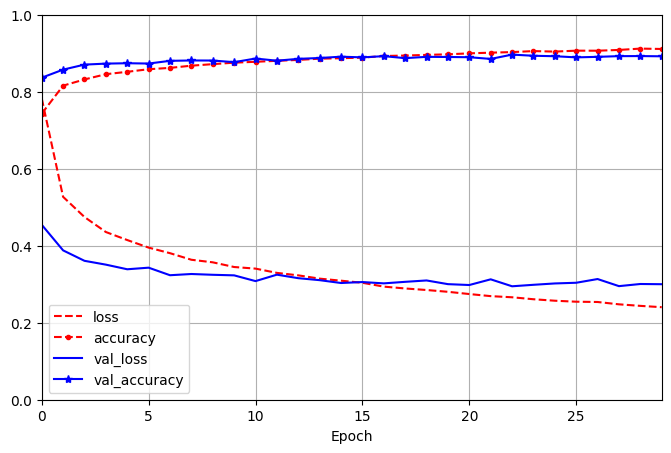

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [6]:
# Evaluate the model on the validation set
val_loss, val_acc = model2_1.evaluate(X_valid, y_valid)
print("Validation loss: {:.3f}, Validation accuracy: {:.3f}".format(val_loss, val_acc))

157/157 [==============================] - 0s 908us/step - loss: 0.3000 - accuracy: 0.8920
Validation loss: 0.300, Validation accuracy: 0.892


Important things to know:

Batch Normalization -  Batch normalization aims to improve training speed and stability by addressing the problem of internal covariate shift. Internal covariate shift refers to the changes in the distribution of activations within hidden layers of a network across different training batches.

    # How it works?  
    
    # Within each mini-batch of training data, batch normalization calculates the mean and standard deviation of the activations of a layer. It then normalizes the activations by subtracting the mean and dividing by the standard deviation. It then normalizes the activations by subtracting the mean and dividing by the standard deviation.

    # Batch normalization introduces two learnable parameters, gamma and beta, to scale and shift the normalized output. This allows the network to recover representational power if normalization alone would limit it.

    #Just need to place the layer, not much else needed.



Dropout -  Dropout is a regularization technique specifically designed to combat overfitting in neural networks. Overfitting occurs when a model gets too good at "memorizing" the training data and loses its ability to generalize to new, unseen data. 
    
    # How it works? 
    
    # During training, dropout randomly "drops" (sets to zero) a certain percentage of neurons (and their connections) from the network. This forces different pathways and causes an ensemble-like effect to allow for averaging.

    # Dropout Rate dictates how many neurons are randomly dropped (ex. .2 = 20%) , and placement of layer